In [1]:
# Execute this cell once to setup the notebook environment, then ignore it

# set the path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# load the notebook's style sheet
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, "r").read())

# embed plots
%matplotlib inline

import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from regression.toolkit import faces_data, plot_results, plot_face

This is the Face Completion project. Your task is to predict the lower part of someones face based on the upper part.
First, pull the data:

In [2]:
(X_train, y_train), (X_test, y_test) = faces_data()

Let's check how it looks like:

Input data has 300 examples, each or them with 2048 features.
Target data has 300 examples, each or them with 2048 features.
The first example is:


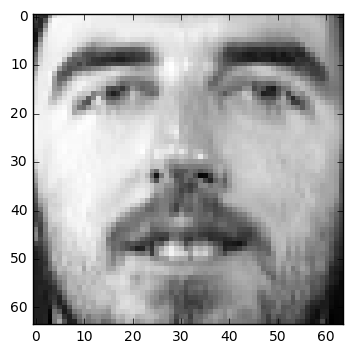

In [3]:
print("Input data has %d examples, each or them with %d features." % (X_train.shape[0], X_train.shape[1]))
print("Target data has %d examples, each or them with %d features." % (y_train.shape[0], y_train.shape[1]))

print("The first example is:")
plot_face(X_train[0], y_train[0])

Now you have to:

1. scale the data
2. use the scaled training data to fit a model
3. predict using the testing data
4. unscale the prediction

Save your results in variable y_test_predict.

In [4]:
Xscaler = StandardScaler()
X_train_scaled = Xscaler.fit_transform(X_train, y_train)
yscaler = StandardScaler()
y_train_scaled = yscaler.fit_transform(y_train)
m, n = X_train_scaled.shape
n_target = y_train_scaled.shape[1]

models = []
for i in xrange(n_target):
    models.append(SGDRegressor(loss='squared_loss',  n_iter=10, eta0=0.00001).fit(X_train_scaled, y_train_scaled[:,i]))

X_test_scaled = Xscaler.transform(X_test)
y_test_predict_scaled = np.zeros((X_test_scaled.shape[0], len(models)))

for i, m in enumerate(models):
    y_test_predict_scaled[:,i] = m.predict(X_test)
y_test_predict = yscaler.inverse_transform(y_test_predict_scaled)

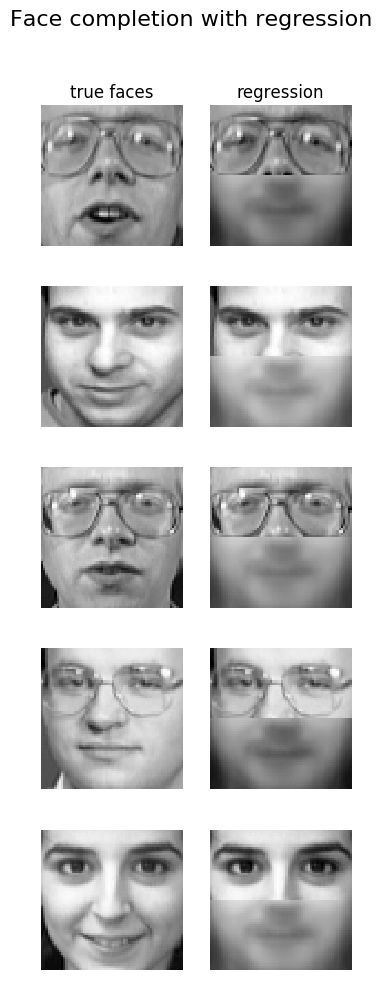

In [5]:
plot_results(X_test, y_test, y_test_predict)